# S&P 500 Return Rate for the Past 5 Years 

## CMSC320 Final Tutorial Project
## By: Eric Qian, Sahil Sinha, Suraj Narang
## 2 Dec 2021

## Introduction

In this project we aim to demonstrate our learning and understanding of the data lifecycle by applying it to reality. Our primary goal in this tutorial is to try and determine whether it is a valid decision to invest in the Standard and Poor's 500 stock market index. 

### Background Info

This index essentially tracks the performance of 500 big companies that are enlisted on US stock exchanges. Often utilized as a benchmark for the whole US equity market, the S&P 500 index is prominently known to be one of the most frequently followed market indices. Rather than seeking to outperform the index through picking stocks, timing the market, or trading actively, these funds depend mainly on the diversification to build returns. The real question is that comes into mind is whether now is a great time to invest in the S&P 500.

### Used Libraries

- Pandas: Organized and portrayed the data within dataframes
- Seaborn: Helped construct plots to depict trends
* Numpy: Helped support the stock data
* Matplotlib: Formatted all the plots effectively
- Datetime: Clearly displayed and separated the dates and times

## Data Loading

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

# Sets the figure size (default) to output bigger-sized models
plt.rcParams["figure.figsize"] = (16,8)

df = pd.read_excel('Price of S&P500 on the First Day of Each Month.xlsx')
df.head(12)

,Year,Month,Stock Price ($) (Closing),Stock Price ($) (Opening),Volume
0,January,2019,2510.03,2476.96,3733160000
1,February,2019,2706.53,2702.32,3759270000
2,March,2019,2803.69,2798.22,3972280000
3,April,2019,2867.19,2848.63,3500760000
4,May,2019,2923.73,2952.33,3645850000
5,June,2019,2744.45,2751.53,3966700000
6,July,2019,2964.33,2971.41,3513270000
7,August,2019,2953.56,2980.32,4762300000
8,September,2019,2906.27,2909.01,3426790000
9,October,2019,2940.25,2983.69,3558040000


The table above represents the monthly stock prices in the year of 2019.

In [2]:
df[12:24]

,Year,Month,Stock Price ($) (Closing),Stock Price ($) (Opening),Volume
12,January,2020,3257.85,3244.67,3458250000
13,February,2020,3248.92,3235.66,3757910000
14,March,2020,3090.23,2974.28,6376400000
15,April,2020,2470.50,2498.08,5947900000
16,May,2020,2830.71,2869.09,4753160000
17,June,2020,3055.73,3038.78,4673410000
18,July,2020,3115.86,3105.92,4443130000
19,August,2020,3294.61,3288.26,4643640000
20,September,2020,3526.65,3507.44,4083110000
21,October,2020,3380.80,3385.87,4070530000


The table above represents the monthly stock prices in the year of 2020.

In [3]:
df[24:36]

,Year,Month,Stock Price ($) (Closing),Stock Price ($) (Opening),Volume
24,January,2021,3700.65,3764.61,5006680000
25,February,2021,3773.86,3731.17,5392870000
26,March,2021,3901.82,3842.51,5071540000
27,April,2021,4019.87,3992.78,4151240000
28,May,2021,4192.66,4191.98,4061170000
29,June,2021,4202.04,4216.52,4122960000
30,July,2021,4319.94,4300.73,3077580000
31,August,2021,4387.16,4406.86,2919940000
32,September,2021,4524.09,4528.80,3101830000
33,October,2021,4357.04,4317.16,3148980000


The table above represents the monthly stock prices in the year of 2021. Each row would be distinguished by the date (year and month), as well as the stock price values. There are a total of 36 entries from the last three years.

In [4]:
wsj_data = pd.read_csv("HistoricalPrices WSJ Source.csv")
wsj_data.columns

Index(['Date', ' Open', ' High', ' Low', ' Close'], dtype='object')

In this above dataset, there are 5 initial columns, including:

* Date (Month and Year, combined)
* Open (Stock price upon opening of market)
* High (Largest amount of expense throughout the day)
* Low (Tiniest amount of expense throughout the day)
* Close (Stock price upon closure of market)

The 'close' column, as briefly seen below, will be vital for our analysis and computations, in order to determine the daily change in stock prices. Utilizing the raw data, this will aid in flowing our calculations and maintaining consistency. Also, the indexes have distinct spacing, so that is taken into account as we modify and clean the data.

In [5]:
wsj_data.head()

,Date,Open,High,Low,Close
0,11/29/2021,4628.75,4672.95,4625.26,4655.27
1,11/26/2021,4664.63,4664.63,4585.43,4594.62
2,11/24/2021,4675.78,4702.87,4659.89,4701.46
3,11/23/2021,4678.48,4699.39,4652.66,4690.70
4,11/22/2021,4712.00,4743.83,4682.17,4682.94


## Data Modification and Cleaning

As stock's adjusted closing prices are usually rounded to the nearest penny, we will take one point of decimal into account. This is due to the fact that brokers may not take limit orders that exceed 3 or more decimal places, and the minimum price variation (MPV) has decreased over time, resulting in these particular stock rules.

A column, representing the price adjustment change per day, will be added to show the difference between the open and close pricings, as well as a column, representing the arbitrariness of the stock prices (contrast between tiniest and largest prices ever recorded during the day.

In [6]:
# Fixates each of the values in the data one decimal places
wsj_data = wsj_data.round(decimals = 1)

# Converts all NaN's to values of 0
wsj_data = wsj_data.fillna(0)

# # Splits the month and year in the data column (types int to str to prevent leading decimal zeros)
wsj_data['Year'] = pd.DatetimeIndex(wsj_data['Date']).year.astype(int).astype(str)
wsj_data['Month'] = pd.DatetimeIndex(wsj_data['Date']).month

# Computes the daily adjustment (in percentange) of S & P 500 prices
wsj_data['Percent_Change'] = (((wsj_data[' ' + 'Close'] - wsj_data[' ' + 'Open'])/ wsj_data[' ' + 'Open']) * 100).reset_index(drop=True)
# Creates a column called "Volatile_Rate" with a price different calculation
wsj_data['Volatile_Rate'] = abs(wsj_data[' ' + 'Low'] - wsj_data[' ' + 'High']).reset_index(drop=True)

# Appends another column called "Quarter_Section" to indicate the months in a quarterly basis
sub_year = []
index = 0
for x in wsj_data['Year']: 
    jan =  wsj_data.iat[index, 7] == "01"
    feb = wsj_data.iat[index, 7] == "02"
    march = wsj_data.iat[index, 7] == "03"
    q1_check = march or feb or jan
    
    apr = wsj_data.iat[index, 7] == "04"
    may = wsj_data.iat[index, 7] == "05"
    jun = wsj_data.iat[index, 7] == "06"
    q2_check = jun or may or apr
    
    jul = wsj_data.iat[index, 7] == "07"
    aug = wsj_data.iat[index, 7] == "08"
    sept = wsj_data.iat[index, 7] == "09"
    q3_check = sept or aug or jul
    
    octo = wsj_data.iat[index, 7] == "10"
    nov = wsj_data.iat[index, 7] == "11"
    dec = wsj_data.iat[index, 7] == "12"
    q4_check = dec or nov or octo
    
    if q1_check == 1:
        sub_year.append(x + " - Q1")
    elif q2_check == 1:
        sub_year.append(x + " - Q2")
    elif q3_check == 1:
        sub_year.append(x + " - Q3")
    elif q4_check == 1: 
        sub_year.append(x + " - Q4")
    else:
        sub_year.append(x + " - Q4")
    index = index + 1

wsj_data['Quarter_Section'] = sub_year
wsj_data

,Date,Open,High,Low,Close,Year,Month,Percent_Change,Volatile_Rate,Quarter_Section
0,11/29/2021,4628.8,4673.0,4625.3,4655.3,2021,11,0.572503,47.7,2021 - Q4
1,11/26/2021,4664.6,4664.6,4585.4,4594.6,2021,11,-1.500665,79.2,2021 - Q4
2,11/24/2021,4675.8,4702.9,4659.9,4701.5,2021,11,0.549639,43.0,2021 - Q4
3,11/23/2021,4678.5,4699.4,4652.7,4690.7,2021,11,0.260767,46.7,2021 - Q4
4,11/22/2021,4712.0,4743.8,4682.2,4682.9,2021,11,-0.617572,61.6,2021 - Q4
...,...,...,...,...,...,...,...,...,...,...
730,1/7/2019,2535.6,2566.2,2524.6,2549.7,2019,1,0.556081,41.6,2019 - Q4
731,1/4/2019,2474.3,2538.1,2474.3,2531.9,2019,1,2.327931,63.8,2019 - Q4
732,1/3/2019,2491.9,2493.1,2444.0,2447.9,2019,1,-1.765721,49.1,2019 - Q4
733,1/2/2019,2477.0,2519.5,2467.5,2510.0,2019,1,1.332257,52.0,2019 - Q4


## Exploratory Data Analysis

Throughout this analysis section, we will take a deeper dive in how the movement of S&P500 stocks are affected on low and high volume days, in terms of months, and further examine the arbitrariness within the stocks.

### Analyzing Monthly/Average Percent Change Versus Days with Large/Small Amount of Volume

In technical analysis, volume is a measure of the amount of stock's shares that have been traded during a stock exchange in a time period. Regarding a good volume for a stock, a high amount of volume would make it more likely to be a sustainable move. On the other hand, a low amount of volume would generally lead to a temporary recovery in price shares after a large tumble. Logically speaking, there would be more demand for the stock in the event that there is more money moving a price of that stock.

Let's add a column "Monthly_Change," which will essentially represent the change from opening to closing stock price.

In [7]:
df['Monthly_Change'] = (((df['Stock Price ($) (Closing)'] - df['Stock Price ($) (Opening)'])/ df['Stock Price ($) (Opening)']) * 100).reset_index(drop = True)
df

,Year,Month,Stock Price ($) (Closing),Stock Price ($) (Opening),Volume,Monthly_Change
0,January,2019,2510.03,2476.96,3733160000,1.335104
1,February,2019,2706.53,2702.32,3759270000,0.155792
2,March,2019,2803.69,2798.22,3972280000,0.195481
3,April,2019,2867.19,2848.63,3500760000,0.651541
4,May,2019,2923.73,2952.33,3645850000,-0.968726
5,June,2019,2744.45,2751.53,3966700000,-0.257311
6,July,2019,2964.33,2971.41,3513270000,-0.238271
7,August,2019,2953.56,2980.32,4762300000,-0.897890
8,September,2019,2906.27,2909.01,3426790000,-0.094190
9,October,2019,2940.25,2983.69,3558040000,-1.455915


Below, we are looking to differentiate between the 10 highest and 10 lowest occurring volume days, along with the overall average days. It would be worth to invest if the points in the plot would end up being heavily skewed one way or another.

In [8]:
def calculate_avg(input):
    return input.describe(include = 'all').loc['mean']

# Stores the top 10 rows with largest and smallest volume into df_most and df_least for plotting
df_most = df.sort_values('Volume', axis = 0, inplace = False, kind = 'quicksort', ascending = False).head(10)
df_least = df.sort_values('Volume', axis = 0, inplace = False, kind = 'quicksort', ascending = True).head(10)

# List keeping track of monthly changes (%) of prices during the 10 largest and smallest volume days 
month_list = list()
month_list.append(df_most['Monthly_Change'])
month_list.append(df_least['Monthly_Change'])

# List keeping track of the average change during the 10 largest and smallest volume days 
mean_list = list()
mean_list.append(df_most['Volume'])
mean_list.append(df_least['Volume'])

# List keeping track of the mean volume and monthly changes from the last 3 years
overall_list = list()
overall_list.append(df['Monthly_Change'])
overall_list.append(df['Volume'])

# Average variables defined
df_most_avg = calculate_avg(month_list[0])
df_least_avg = calculate_avg(month_list[1])
df_most_vol = calculate_avg(mean_list[0])
df_least_vol = calculate_avg(mean_list[1])

# Finds average volume and daily percent change of last 3 years
df_avg_percent = calculate_avg(overall_list[0])
df_avg_vol = calculate_avg(overall_list[1])

Text(0, 0.5, 'Monthly Change (%)')

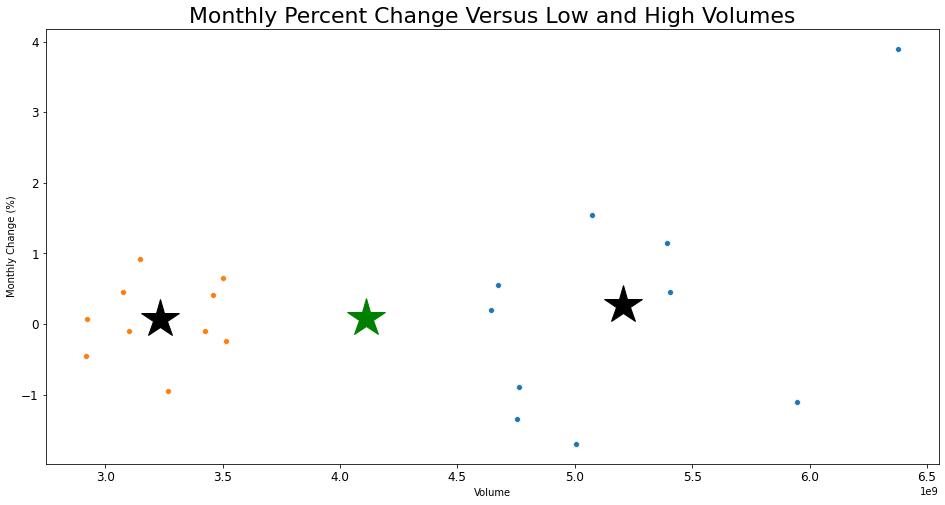

In [9]:
# Plots all individual points for df dataset (10 most and least volume days, respectively)
sns.scatterplot(data = df_most, x = "Volume", y = "Monthly_Change")
sns.scatterplot(data = df_least, x = "Volume", y = "Monthly_Change")

# Plots averages
plt.plot(df_most_vol, df_most_avg, marker='*', markersize = 40, linestyle='none', color = 'black')
plt.plot(df_least_vol, df_least_avg, marker='*', markersize = 40, linestyle='none', color = 'black')
plt.plot(df_avg_vol, df_avg_percent, marker='*', markersize = 40, linestyle='none', color = 'Green')

plt.title('Monthly Percent Change Versus Low and High Volumes', fontsize = 22)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.xlabel("Volume")
plt.ylabel("Monthly Change (%)")

This matplotlib plot for S&P 500's price changes in monthly rate versus volume portrays that there is a lot of adjustment in the stock prices when it comes to high volume days, whereas barely any change in low volume days. The stock value rises for the majority of the time on high volume days, and it can be noticed how its peaks almost touch the +4% mark (outlier point), but the nadir falls well below -1%.

Thereby, this shows that spending money on a low or high volume day is far more perilous than holding a stock during an average period of time.

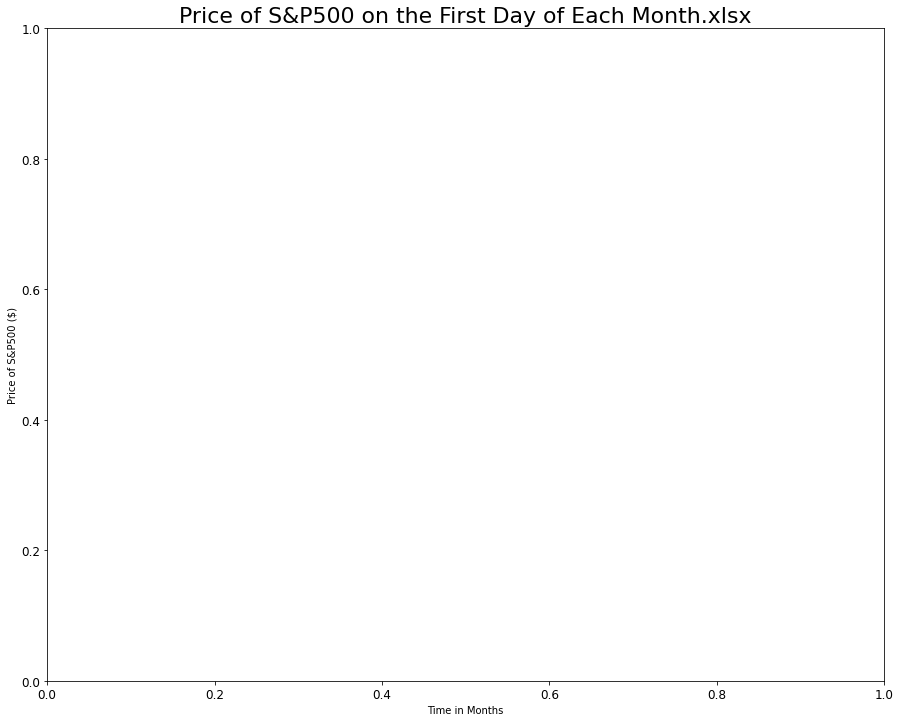

In [10]:
plt.figure(figsize = (15, 12))
plt.title("Price of S&P500 on the First Day of Each Month.xlsx", fontsize=22)
plt.xticks(fontsize=12); plt.yticks(fontsize=12)
plt.xlabel("Time in Months")
plt.ylabel("Price of S&P500 ($)")
years_table = pd.DataFrame(columns = ['Year'] + ['Month'])
